In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("loan_approval_dataset.csv")

In [3]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
df.shape

(4269, 13)

In [5]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [6]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [7]:
df.columns = ['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'annual_income', 'loan_amount', 'loan_term', 'credit_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status']

In [8]:
df.isnull().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
annual_income               0
loan_amount                 0
loan_term                   0
credit_score                0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [9]:
df.drop(['loan_id'],axis=1,inplace=True)

In [10]:
# Movable Assets
df['Movable_assets'] = df['bank_asset_value'] + df['luxury_assets_value']

#Immovable Assets
df['Immovable_assets'] = df['residential_assets_value'] + df['commercial_assets_value']

In [11]:
df.drop(columns=['bank_asset_value','luxury_assets_value', 'residential_assets_value', 'commercial_assets_value' ], inplace=True)

Text(0.5, 1.0, 'Number of Dependents')

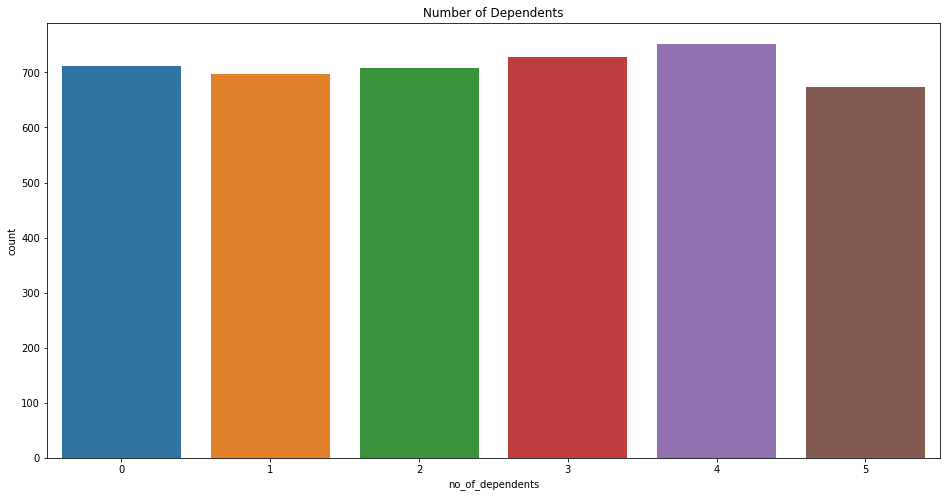

In [12]:
plt.figure(figsize=(16,8))
sns.countplot(x = 'no_of_dependents', data = df).set_title('Number of Dependents')

<AxesSubplot:xlabel='no_of_dependents', ylabel='count'>

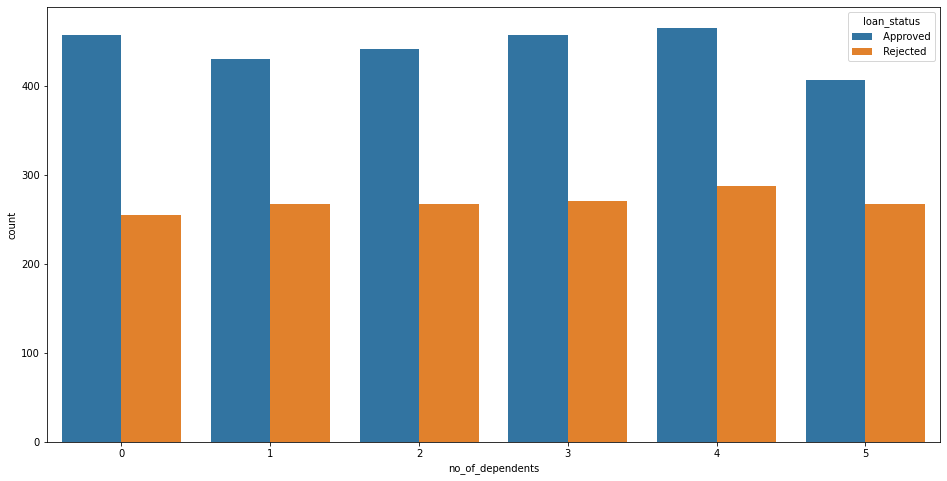

In [13]:
plt.figure(figsize=(16,8))
sns.countplot(x = 'no_of_dependents', data = df, hue = 'loan_status')

Text(0.5, 1.0, 'Self Employed')

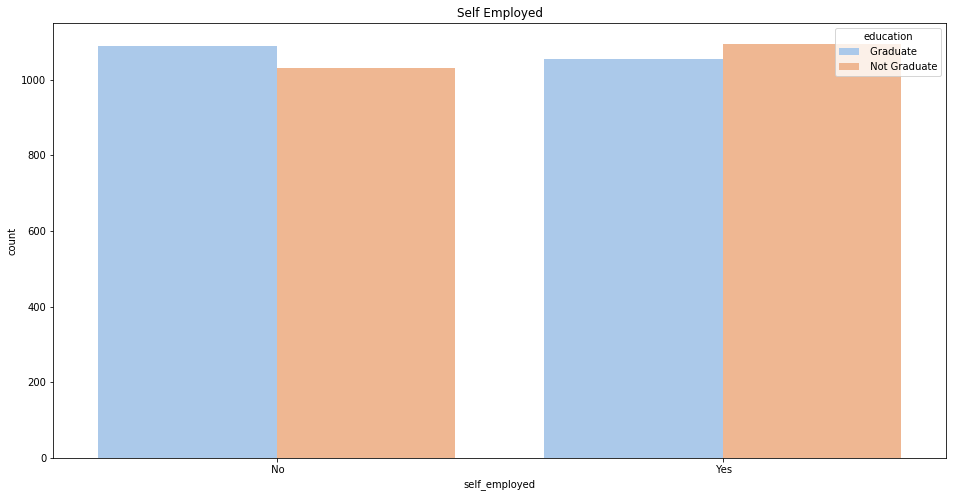

In [14]:

plt.figure(figsize=(16,8))
sns.countplot(x='self_employed', data = df, hue = 'education',palette='pastel').set_title('Self Employed')

Text(0.5, 1.0, 'Loan Status by Education')

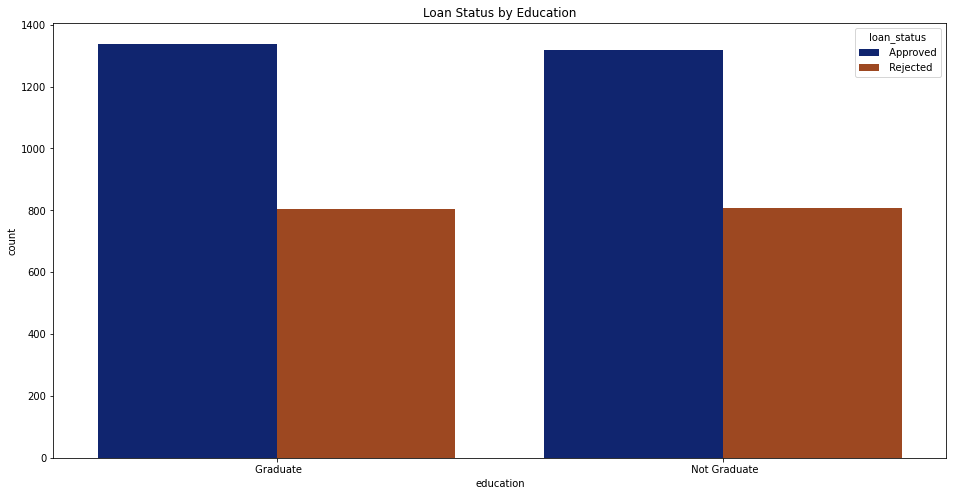

In [15]:
plt.figure(figsize=(16,8))
sns.countplot(x = 'education', hue = 'loan_status', data = df,palette='dark').set_title('Loan Status by Education')

Text(0.5, 1.0, 'Loan Amount vs. Loan Term')

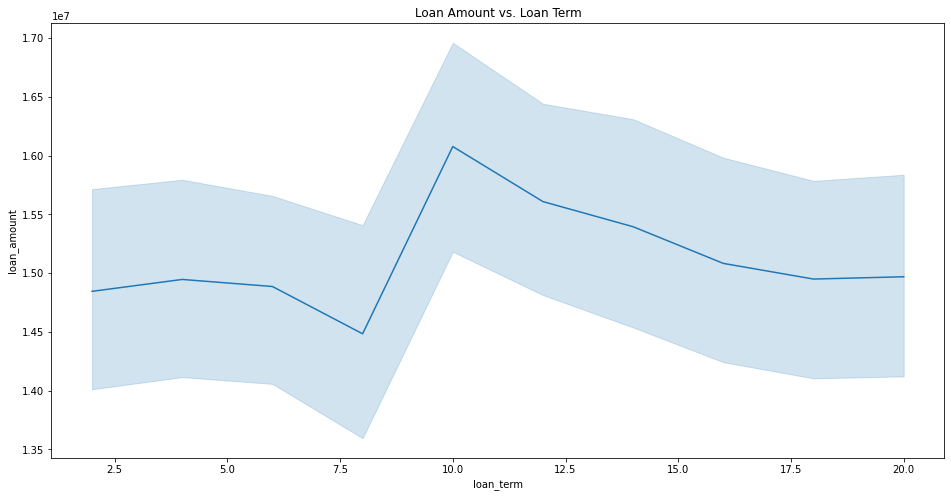

In [16]:
plt.figure(figsize=(16,8))
sns.lineplot(x = 'loan_term', y = 'loan_amount', data = df).set_title('Loan Amount vs. Loan Term')

<AxesSubplot:xlabel='loan_term', ylabel='loan_amount'>

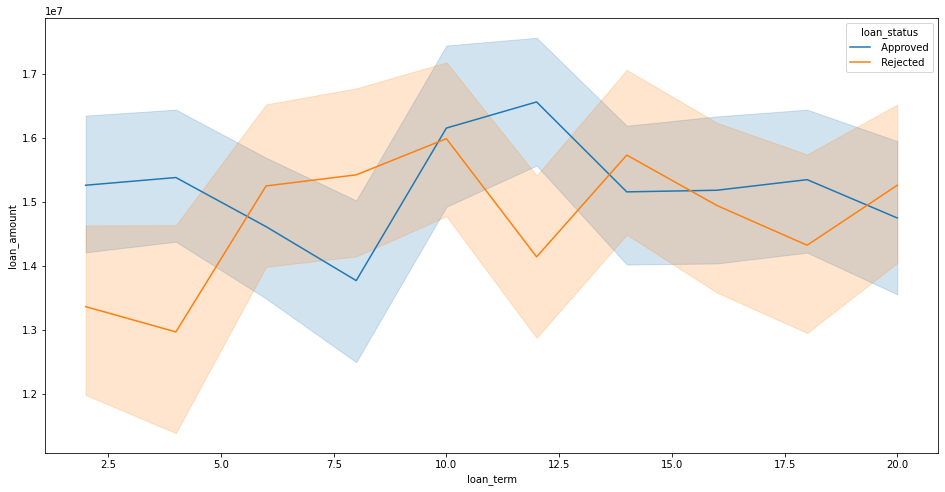

In [17]:
plt.figure(figsize=(16,8))
sns.lineplot(x='loan_term', y='loan_amount', data=df, hue='loan_status')

In [18]:
self_employed = {' No':0, ' Yes':1}
df['self_employed'] = df['self_employed'].apply(lambda x:self_employed[x])

In [19]:
education = {' Graduate': 1, ' Not Graduate': 0}
df['education'] = df['education'].apply(lambda x: education[x])

In [20]:
status = {' Approved':1, ' Rejected':0}
df['loan_status'] = df['loan_status'].apply(lambda x: status[x])


In [21]:
y=df['loan_status']
x=df.drop('loan_status', axis=1)


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lgr = LogisticRegression()

lgr.fit(X_train, y_train)

predictions = lgr.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.6276346604215457


In [26]:
from sklearn.svm import SVC
model = SVC()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.6276346604215457


In [27]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)
dtree.score(X_train, y_train)
accuracy = accuracy_score(y_test, dtree_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9812646370023419


In [28]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, rfc_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9754098360655737


In [29]:
df.head()


,no_of_dependents,education,self_employed,annual_income,loan_amount,loan_term,credit_score,loan_status,Movable_assets,Immovable_assets
0,2,1,0,9600000,29900000,12,778,1,30700000,20000000
1,0,0,1,4100000,12200000,8,417,0,12100000,4900000
2,3,1,0,9100000,29700000,20,506,0,46100000,11600000
3,3,1,0,8200000,30700000,8,467,0,31200000,21500000
4,5,0,1,9800000,24200000,20,382,0,34400000,20600000
